In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import tqdm
import os
import random

In [2]:
def initialize_string_matrix(lines):
  string_mat = []
  for line in lines:
    if line[0] == '0' or line[0] == '1':
      string_mat.append(line[:-3])
  return string_mat

In [3]:
def initialize_ones_matrix(string_mat):
  matrix = []
  for string_row in string_mat:
    row = []
    for i in range(len(string_row)):
      if i % 2 == 0:
        row.append(int(string_row[i]))
    matrix.append(row)
  return matrix

In [4]:
def read_matrix(file_name):
  with open(file_name, 'r') as f:
    lines = f.readlines()
  string_mat = initialize_string_matrix(lines)
  matrix = initialize_ones_matrix(string_mat)
  return np.array(matrix)

In [5]:
def initialize_sets_dict(matrix, M):
  sets_dict = {}
  for i in range(matrix.shape[1]):
    col = np.unique(matrix[:, i])
    if len(col) > 1:
      sets_dict[M[i]] = ANALYZE
    elif col == 1:
      sets_dict[M[i]] = MHS
    elif col == 0:
      sets_dict[M[i]] = KO
  return sets_dict

In [6]:
def initialize_new_matrix(matrix, M):
  new_matrix = []
  for row in matrix:
    new_matrix_row = []
    for row_index in range(len(row)):
      if row[row_index] == 1:
        new_matrix_row.append(M[row_index])
      else:
        new_matrix_row.append("")
    new_matrix.append(new_matrix_row)
  new_matrix = np.array(new_matrix)
  return new_matrix

In [7]:
def initialize_indices(M):
  indices = {}
  index = 0
  for letter in M:
    indices[letter] = index
    index += 1
  return indices

In [8]:
def initialize_queue(M, sets_dict, indices):
  queue = []
  minimum_sets = [letter for letter in M if sets_dict[letter] == MHS]
  old_queue = [letter for letter in M if sets_dict[letter] == ANALYZE and letter != M[-1]]
  # print(old_queue)
  for letter1 in old_queue:
    for letter2 in M:
      arr = [letter1]
      if sets_dict[letter2] == ANALYZE and indices[letter1] < indices[letter2]:
        arr.append(letter2)
        queue.append(arr)
  return queue, minimum_sets

In [9]:
def check(lambda_set):
  lambda_indices = [indices[letter] for letter in lambda_set]
  # print(lambda_indices)
  filtered_matrix = new_matrix[:, lambda_indices]
  # print(filtered_matrix)
  vec = ["".join(col) for col in filtered_matrix]
#   print(vec)
  new_vec = [elem for elem in vec if elem.count('z') <= 1]
#   print(new_vec)
  new_vec = np.array(new_vec)
  proj_vec = np.unique(new_vec)
  # print(proj_vec)
  if proj_vec.tolist() == lambda_set:
    return "MHS"
  elif proj_vec.tolist() == [''] + lambda_set:
    return "OK"
  return "KO"

In [10]:
def write_results(filename, minimum_sets, matrix, elapsed_time, isSolved):
  with open(filename, "w") as f:
    f.write(str(len(minimum_sets)) + "\n")
    f.write(str(elapsed_time) + "\n")
    f.write(str(matrix.shape[1]) + "\n")
    f.write(str(matrix.shape[0]) + "\n")
    f.write(str(isSolved) + "\n")
    f.write(str(matrix.shape[0] * matrix.shape[1]) + "\n")
    for minimum_set in minimum_sets:
      for single_set in minimum_set:
        f.write(f"{single_set}, ")
      f.write("\n")
    f.close()

In [11]:
MHS = 'MHS'
KO = 'KO'
ANALYZE = 'ANALYZE'

In [12]:
benchmark_1 = "./benchmarks1/benchmarks1"
benchmark_2 = "./benchmarks2/benchmarks2"

In [13]:
matrices_files_1 = sorted(os.listdir(benchmark_1))
matrices_files_2 = sorted(os.listdir(benchmark_2))

In [15]:
os.makedirs("./benchmarks_1_mhs", exist_ok=True)
os.makedirs("./benchmarks_2_mhs", exist_ok=True)

In [ ]:
import time
from tqdm.auto import tqdm
processed_times = []
for matrix_file in tqdm(matrices_files_2[1093:]):
  start = time.time()
  isInterrupted = False
  matrix = read_matrix(benchmark_2 + "/" + matrix_file)
  M = np.array(["z" + str(i + 1) for i in range(matrix.shape[1])])
  sets_dict = initialize_sets_dict(matrix, M)
  new_matrix = initialize_new_matrix(matrix, M)
  indices = initialize_indices(M)
  minimum_sets = []
  queue, minimum_sets = initialize_queue(M, sets_dict, indices)
  while len(queue) > 0:
    lambda_set = queue.pop(0)
    elapsed_time = time.time() - start
    
    if elapsed_time > 600:
      print("Maximum time reached, processing the next entity")
      isInterrupted = True
      processed_times.append(elapsed_time)
      write_results(f"./benchmarks_2_mhs/{matrix_file}", minimum_sets, matrix, elapsed_time, isSolved=False)
      break
    # print("Lambda Set: ", lambda_set)
    
    res = check(lambda_set)

    # print(res)

    if res == "OK" and lambda_set[-1][-1] != M[-1]:
      new_sets = [lambda_set + [letter] for letter in M if indices[letter] > indices[lambda_set[-1]] and sets_dict[letter] == ANALYZE]
      # print("New Sets: ", new_sets)
      for new_set in new_sets:
        queue.append(new_set)
    if res == MHS:
      # print("MHS: ", lambda_set)
      minimum_sets.append(lambda_set)
  # print(minimum_sets)
  if not isInterrupted:
    end = time.time() - start
    processed_times.append(end)
    write_results(f"./benchmarks_2_mhs/{matrix_file}", minimum_sets, matrix, elapsed_time, isSolved=True)
processed_times

  0%|          | 0/307 [00:00<?, ?it/s]

Maximum time reached, processing the next entity
Maximum time reached, processing the next entity
Maximum time reached, processing the next entity
Maximum time reached, processing the next entity
Maximum time reached, processing the next entity
Maximum time reached, processing the next entity
Maximum time reached, processing the next entity
Maximum time reached, processing the next entity
Maximum time reached, processing the next entity
Maximum time reached, processing the next entity
Maximum time reached, processing the next entity


In [15]:
sum(processed_times)

19200.08116364479

In [22]:
results_files = os.listdir("./benchmarks_1_mhs")
useful_results = []
for result_file in tqdm(results_files):
    path1 = f"./benchmarks_1_mhs/{result_file}"
    path2 = f"./benchmarks_1_other_data/{result_file}"
    with open(path1) as f:
        lines = f.readlines()
        source_file = result_file
        seconds = float(lines[1][:-1])
        cols = int(lines[2][:-1])
        rows = int(lines[3][:-1])
        solved = lines[4][:-1]
        if solved == 'True':
            solved = True
        else:
            solved = False
        # print(seconds, solved, cols * rows)
        f.close()
    with open(path2) as f:
        lines = f.readlines()
        zeros_count = int(lines[0][:-1])
        ones_count = int(lines[1][:-1])
        total_elems = int(lines[2][:-1])
        zero_ratio = float(lines[3][:-1])
        one_ratio = float(lines[4][:-1])
        rank = int(lines[5][:-1])
        f.close()
        useful_results.append([source_file, seconds, cols, rows, solved, rows * cols, zeros_count, ones_count, zero_ratio,
                              one_ratio, rank])
useful_results

  0%|          | 0/1371 [00:00<?, ?it/s]

[['74181.000.matrix',
  0.07090330123901367,
  66,
  3,
  True,
  198,
  144,
  54,
  0.7272727272727273,
  0.2727272727272727,
  3],
 ['74181.001.matrix',
  0.022542953491210938,
  66,
  2,
  True,
  132,
  103,
  29,
  0.7803030303030303,
  0.2196969696969697,
  2],
 ['74181.002.matrix',
  0.010998249053955078,
  66,
  2,
  True,
  132,
  98,
  34,
  0.7424242424242424,
  0.25757575757575757,
  2],
 ['74181.003.matrix',
  0.02100062370300293,
  66,
  2,
  True,
  132,
  121,
  11,
  0.9166666666666666,
  0.08333333333333333,
  2],
 ['74181.004.matrix',
  0.007001399993896484,
  66,
  2,
  True,
  132,
  107,
  25,
  0.8106060606060606,
  0.1893939393939394,
  2],
 ['74181.005.matrix',
  0.025998830795288086,
  66,
  4,
  True,
  264,
  196,
  68,
  0.7424242424242424,
  0.25757575757575757,
  4],
 ['74181.006.matrix',
  0.009994745254516602,
  66,
  2,
  True,
  132,
  114,
  18,
  0.8636363636363636,
  0.13636363636363635,
  2],
 ['74181.007.matrix',
  0.007569551467895508,
  66,
  

In [23]:
df = pd.DataFrame(useful_results, columns=["source_file", "seconds", "cols", "rows", "is_solved", "#elements", "zeros_count",
                                          "ones_count", "zero_ratio", "one_ratio", "matrix_rank"])
df

,source_file,seconds,cols,rows,is_solved,#elements,zeros_count,ones_count,zero_ratio,one_ratio,matrix_rank
0,74181.000.matrix,0.070903,66,3,True,198,144,54,0.727273,0.272727,3
1,74181.001.matrix,0.022543,66,2,True,132,103,29,0.780303,0.219697,2
2,74181.002.matrix,0.010998,66,2,True,132,98,34,0.742424,0.257576,2
3,74181.003.matrix,0.021001,66,2,True,132,121,11,0.916667,0.083333,2
4,74181.004.matrix,0.007001,66,2,True,132,107,25,0.810606,0.189394,2
...,...,...,...,...,...,...,...,...,...,...,...
1366,c880.241.matrix,600.002872,384,47,False,18048,17207,841,0.953402,0.046598,47
1367,c880.242.matrix,600.000333,384,43,False,16512,16015,497,0.969901,0.030099,43
1368,c880.243.matrix,600.004869,384,43,False,16512,15855,657,0.960211,0.039789,42
1369,c880.244.matrix,600.000890,384,36,False,13824,13505,319,0.976924,0.023076,36


<AxesSubplot:>

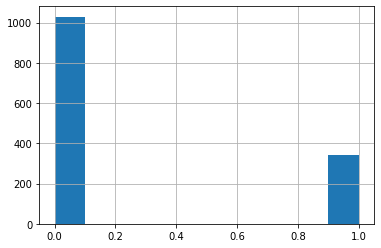

In [18]:
df = df.replace([False, True], [0, 1])
df['is_solved'].hist()

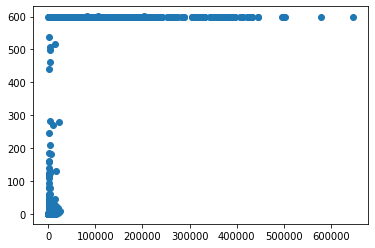

In [19]:
seconds_per_elements = df[['seconds', '#elements']]
# print(seconds_per_elements)
X = seconds_per_elements['#elements']
y = seconds_per_elements['seconds']
plt.scatter(X, y)

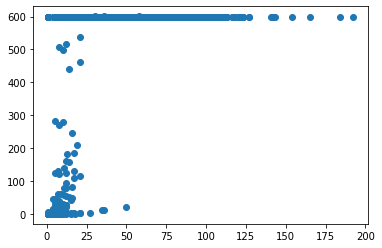

In [20]:
seconds_per_rows = df[['seconds', 'rows']]
X = seconds_per_rows['rows']
y = seconds_per_rows['seconds']
plt.scatter(X, y)

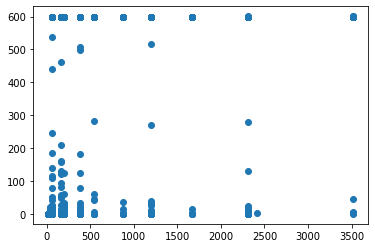

In [21]:
seconds_per_cols = df[['seconds', 'cols']]
X = seconds_per_cols['cols']
y = seconds_per_cols['seconds']
plt.scatter(X, y)

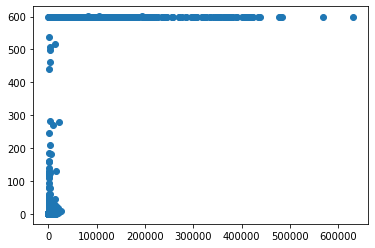

In [24]:
seconds_per_zeros_count = df[['seconds', 'zeros_count']]
X = seconds_per_zeros_count['zeros_count']
y = seconds_per_zeros_count['seconds']
plt.scatter(X, y)

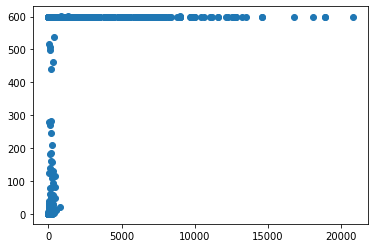

In [25]:
seconds_per_ones_count = df[['seconds', 'ones_count']]
X = seconds_per_ones_count['ones_count']
y = seconds_per_ones_count['seconds']
plt.scatter(X, y)

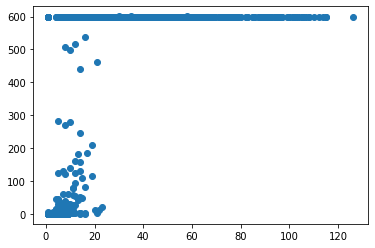

In [26]:
seconds_per_rank = df[['seconds', 'matrix_rank']]
X = seconds_per_rank['matrix_rank']
y = seconds_per_rank['seconds']
plt.scatter(X, y)

In [22]:
df.sort_values(by=['seconds'])

,file_type,seconds,cols,rows,is_solved,#elements
57,74182.003.matrix,0.006019,20,2,1,40
4,74181.004.matrix,0.007001,66,2,1,132
137,74L85.003.matrix,0.007003,33,2,1,66
63,74182.009.matrix,0.007003,20,1,1,20
62,74182.008.matrix,0.007003,20,1,1,20
...,...,...,...,...,...,...
997,c7552.000.matrix,600.022424,3512,29,0,101848
873,c5315.164.matrix,600.023529,2308,27,0,62316
883,c5315.178.matrix,600.285972,2308,36,0,83088
1093,c7552.134.matrix,600.668498,3512,58,0,203696


In [27]:
#Pick the bigger solved instance
solved_df = df[df['is_solved'] == 1]
solved_df['#elements'].max()
solved_df.sort_values(by="#elements")

,file_type,seconds,cols,rows,is_solved,#elements
63,74182.009.matrix,0.007003,20,1,1,20
62,74182.008.matrix,0.007003,20,1,1,20
61,74182.007.matrix,0.007003,20,1,1,20
60,74182.006.matrix,0.007003,20,1,1,20
59,74182.005.matrix,0.007003,20,1,1,20
...,...,...,...,...,...,...
780,c5315.040.matrix,17.902951,2308,9,1,20772
779,c5315.039.matrix,2.147076,2308,9,1,20772
787,c5315.049.matrix,4.417778,2308,10,1,23080
781,c5315.041.matrix,280.701851,2308,10,1,23080


In [15]:
os.makedirs("./benchmarks_1_other_data", exist_ok=True)
os.makedirs("./benchmarks_2_other_data", exist_ok=True)

In [18]:
for matrix_file in tqdm(matrices_files_1):
    matrix = read_matrix(benchmark_1 + "/" + matrix_file)
    condition0 = matrix == 0
    condition1 = matrix == 1
    zeros_count = np.count_nonzero(condition0)
    ones_count = np.count_nonzero(condition1)
    total_elems = zeros_count + ones_count
    zero_ratio = zeros_count / float(total_elems)
    one_ratio = ones_count / float(total_elems)
    rank = np.linalg.matrix_rank(matrix)
    file_to_write = f"./benchmarks_1_other_data/{matrix_file}"
    with open(file_to_write, "w") as f:
        f.write(str(zeros_count) + "\n")
        f.write(str(ones_count) + "\n")
        f.write(str(total_elems) + "\n")
        f.write(str(zero_ratio) + "\n")
        f.write(str(one_ratio) + "\n")
        f.write(str(rank) + "\n")
        f.close()

  0%|          | 0/1371 [00:00<?, ?it/s]